# ICE-4 Text Data: Flattening, Filtering, and Chunking

In [1]:
# Alexis Blackwell
# Ice 4

## (Tutorial) Bag of X
Following is a sample of applying bag of n-grams to Yelp academic dataset review, please download it with following link:

https://github.com/knowitall/yelp-dataset-challenge/blob/master/data/yelp_phoenix_academic_dataset/yelp_academic_dataset_review.json

In [2]:
import pandas as pd
import json

In [3]:
f = open(r'C:\Users\black\CSCE5222_Feature_Engineering\Feature_Engineering_ICE_4\yelp_academic_dataset_review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 8)

In [4]:
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


note: in the default settings of CountVectorizer, the token_pattern = '(?u)\\b\\w\\w+\\b', which ignores single-character words. Whe employ the token_pattern = '(?u)\\b\\w+\\b' to include the single-character words. 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])

In [6]:
unigram = bow_converter.get_feature_names_out()

In [7]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])

In [8]:
bigram = bigram_converter.get_feature_names_out()

In [9]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])

In [10]:
trigram = trigram_converter.get_feature_names_out()

In [11]:
unigram

array(['0', '00', '000', ..., 'école', 'ém', 'òc'], dtype=object)

In [12]:
bigram

array(['0 0', '0 20', '0 39', ..., 'école lenôtre', 'ém all', 'òc châm'],
      dtype=object)

In [13]:
trigram

array(['0 0 eye', '0 20 less', '0 39 oz', ..., 'école lenôtre trained',
       'ém all they', 'òc châm a'], dtype=object)

In [14]:
print (len(unigram), len(bigram), len(trigram))

29222 368943 881620


In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


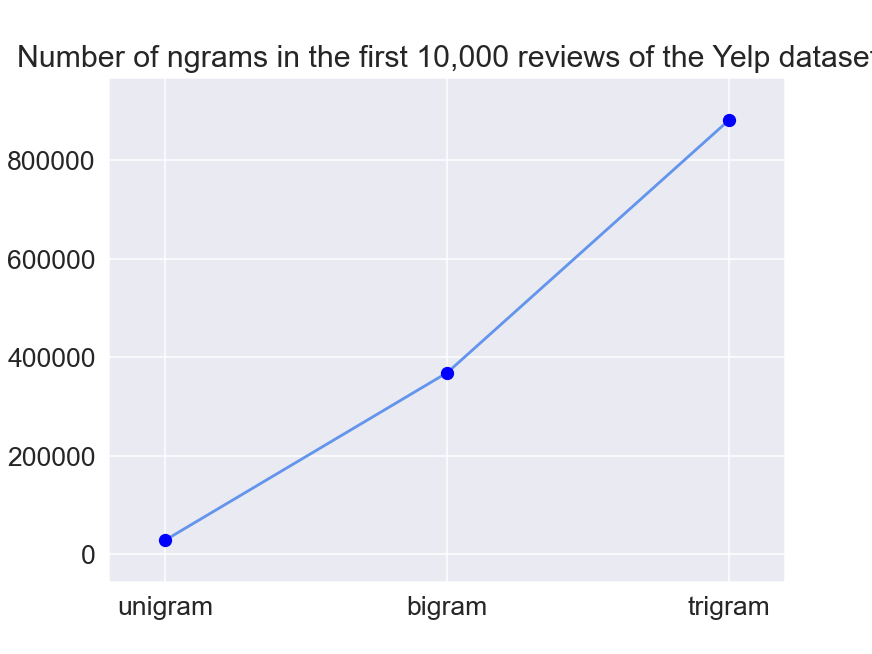

In [16]:
sns.set_style("darkgrid")
counts = [len(unigram), len(bigram), len(trigram)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

## Task 1. 1 Applying the unigram, bigram, and trigram tokenization methods to the given text below. 

In [17]:
train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""

# write your code here
df_engram = pd.DataFrame([train_text],columns=['Text'])

In [18]:
display(df_engram) # check 

,Text
0,My wife took me here on my birthday for breakf...


In [19]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(df_engram['Text'])

unigram = bow_converter.get_feature_names_out() # get unigram

bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(df_engram['Text'])

bigram = bigram_converter.get_feature_names_out() # get bigram

trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(df_engram['Text'])

trigram = trigram_converter.get_feature_names_out() # get trigram

In [20]:
unigram # check 

array(['2', 'a', 'absolute', 'absolutely', 'amazing', 'an', 'and',
       'anyway', 'arrived', 'back', 'best', 'better', 'birthday', 'blend',
       'bloody', 'bread', 'breakfast', 'busy', 'came', 'can', 'complete',
       'delicious', 'do', 'earlier', 'eggs', 'ever', 'everything',
       'excellent', 'favor', 'fills', 'food', 'for', 'fresh', 'from',
       'garden', 'get', 'go', 'griddled', 'grounds', 'had', 'here', 'i',
       'ingredients', 'it', 'like', 'looked', 'looks', 'm', 'made',
       'mary', 'me', 'meal', 'menu', 'morning', 'my', 'of', 'on', 'only',
       'order', 'our', 'outside', 'overlooking', 'perfect', 'phenomenal',
       'pieces', 'place', 'pleasure', 'pretty', 'quickly', 'saturday',
       'scrambled', 'semi', 'simply', 'sitting', 'skillet', 'so', 'sure',
       't', 'tasty', 'the', 'their', 'them', 'they', 'to', 'toast',
       'took', 'truffle', 'up', 'use', 've', 'vegetable', 'wait',
       'waitress', 'was', 'weather', 'when', 'which', 'while', 'white',
       

In [21]:
bigram # check

array(['2 pieces', 'a favor', 'absolute pleasure', 'absolutely made',
       'amazing and', 'amazing while', 'an absolute', 'and blend',
       'and delicious', 'and get', 'and it', 'and our', 'and simply',
       'anyway i', 'arrived quickly', 'best i', 'best toast', 'better do',
       'birthday for', 'blend them', 'bloody mary', 'bread with',
       'breakfast and', 'busy saturday', 'came with', 'can t',
       'complete it', 'delicious it', 'do yourself', 'earlier you',
       'eggs vegetable', 'ever had', 'everything on', 'excellent and',
       'excellent i', 'excellent the', 'favor and', 'fills up',
       'food arrived', 'for breakfast', 'fresh when', 'from their',
       'garden and', 'get here', 'get their', 'go back', 'griddled bread',
       'grounds an', 'had anyway', 'had i', 'had the', 'here on',
       'here the', 'i can', 'i had', 'i m', 'i ve', 'ingredients from',
       'it absolutely', 'it came', 'it it', 'it looked', 'it was',
       'like the', 'looked like', 'loo

In [22]:
trigram # check

array(['2 pieces of', 'a favor and', 'absolute pleasure our',
       'absolutely made the', 'amazing and it',
       'amazing while everything', 'an absolute pleasure',
       'and blend them', 'and delicious it', 'and get their',
       'and it absolutely', 'and it was', 'and our food',
       'and simply the', 'anyway i can', 'arrived quickly on',
       'best i ve', 'best toast i', 'better do yourself',
       'birthday for breakfast', 'blend them fresh', 'bloody mary it',
       'bread with was', 'breakfast and it', 'busy saturday morning',
       'came with 2', 'can t wait', 'complete it was',
       'delicious it came', 'do yourself a', 'earlier you get',
       'eggs vegetable skillet', 'ever had anyway', 'ever had i',
       'everything on the', 'excellent and our', 'excellent i had',
       'excellent the weather', 'favor and get', 'fills up pretty',
       'food arrived quickly', 'for breakfast and', 'fresh when you',
       'from their garden', 'garden and blend', 'get here 

Overall, this step shows the unigrams, bigrams, and trigrams that are present in this piece of text. Each n-gram captures some text context that could be used by a model that is not captured when only considering each word as a single element. For example the bigram vegetable skillet could be useful to capture the context that the meal was vegetarian which could be useful context.

## Task 1.2 Create your own naive tokenization method (whitespace-based), and apply it to the text given in the task 1.1
note: 1. do not use the existing togkenization methods given by NLP; 2. split the words by whitespace character, the output is more likely as the unigram; 3. no repeating elements in the output.

In [23]:
print(train_text) # check

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  
I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  
It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [24]:
# write you code here
# using same df_engram text string
# token_pattern='(?u)\\b\\w+\\b' original
token_pattern = '(?u)\\w+' # chosen token pattern
bow_converter = CountVectorizer(token_pattern=token_pattern)
x = bow_converter.fit_transform(df_engram['Text'])

unigram = bow_converter.get_feature_names_out() # get unigram

bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern=token_pattern)
x2 = bigram_converter.fit_transform(df_engram['Text'])

bigram = bigram_converter.get_feature_names_out() # get bigram

trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern=token_pattern)
x3 = trigram_converter.fit_transform(df_engram['Text'])

trigram = trigram_converter.get_feature_names_out() # get trigram 

In [25]:
unigram # check

array(['2', 'a', 'absolute', 'absolutely', 'amazing', 'an', 'and',
       'anyway', 'arrived', 'back', 'best', 'better', 'birthday', 'blend',
       'bloody', 'bread', 'breakfast', 'busy', 'came', 'can', 'complete',
       'delicious', 'do', 'earlier', 'eggs', 'ever', 'everything',
       'excellent', 'favor', 'fills', 'food', 'for', 'fresh', 'from',
       'garden', 'get', 'go', 'griddled', 'grounds', 'had', 'here', 'i',
       'ingredients', 'it', 'like', 'looked', 'looks', 'm', 'made',
       'mary', 'me', 'meal', 'menu', 'morning', 'my', 'of', 'on', 'only',
       'order', 'our', 'outside', 'overlooking', 'perfect', 'phenomenal',
       'pieces', 'place', 'pleasure', 'pretty', 'quickly', 'saturday',
       'scrambled', 'semi', 'simply', 'sitting', 'skillet', 'so', 'sure',
       't', 'tasty', 'the', 'their', 'them', 'they', 'to', 'toast',
       'took', 'truffle', 'up', 'use', 've', 'vegetable', 'wait',
       'waitress', 'was', 'weather', 'when', 'which', 'while', 'white',
       

In [26]:
bigram # check

array(['2 pieces', 'a favor', 'absolute pleasure', 'absolutely made',
       'amazing and', 'amazing while', 'an absolute', 'and blend',
       'and delicious', 'and get', 'and it', 'and our', 'and simply',
       'anyway i', 'arrived quickly', 'best i', 'best toast', 'better do',
       'birthday for', 'blend them', 'bloody mary', 'bread with',
       'breakfast and', 'busy saturday', 'came with', 'can t',
       'complete it', 'delicious it', 'do yourself', 'earlier you',
       'eggs vegetable', 'ever had', 'everything on', 'excellent and',
       'excellent i', 'excellent the', 'favor and', 'fills up',
       'food arrived', 'for breakfast', 'fresh when', 'from their',
       'garden and', 'get here', 'get their', 'go back', 'griddled bread',
       'grounds an', 'had anyway', 'had i', 'had the', 'here on',
       'here the', 'i can', 'i had', 'i m', 'i ve', 'ingredients from',
       'it absolutely', 'it came', 'it it', 'it looked', 'it was',
       'like the', 'looked like', 'loo

In [27]:
trigram # check

array(['2 pieces of', 'a favor and', 'absolute pleasure our',
       'absolutely made the', 'amazing and it',
       'amazing while everything', 'an absolute pleasure',
       'and blend them', 'and delicious it', 'and get their',
       'and it absolutely', 'and it was', 'and our food',
       'and simply the', 'anyway i can', 'arrived quickly on',
       'best i ve', 'best toast i', 'better do yourself',
       'birthday for breakfast', 'blend them fresh', 'bloody mary it',
       'bread with was', 'breakfast and it', 'busy saturday morning',
       'came with 2', 'can t wait', 'complete it was',
       'delicious it came', 'do yourself a', 'earlier you get',
       'eggs vegetable skillet', 'ever had anyway', 'ever had i',
       'everything on the', 'excellent and our', 'excellent i had',
       'excellent the weather', 'favor and get', 'fills up pretty',
       'food arrived quickly', 'for breakfast and', 'fresh when you',
       'from their garden', 'garden and blend', 'get here 

This next step varies the pattern and produces a similar result and it seems as though the unigrams, bigrams, and trigrams are all the same. 

## **Question 1**. Given a sentence "He likes cat". In unigram representation, it could be "He", "likes", "cat". In bigram representation, it could be "He likes", "likes cat". In trigram representation, it could be "He likes cat". Explain why the storage and computation cost increase with the growth of n in n-gram methods. 

Answer to Q1: type your answer here:

---

## (Tutorial) Stemming and Lemmatization

In [28]:
# import PorterStemmer class form nltk.stem.porter module
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() 

stem = stemmer.stem('flowers')  
print(f"'flowers' after stemming: {stem}")

stem = stemmer.stem('zeroes')
print(f"'zeroes' after stemming: {stem}")

stem = stemmer.stem('better')
print(f"'better' after stemming: {stem}")

stem = stemmer.stem('sixties')
print(f"'sixties' after stemming: {stem}")

stem = stemmer.stem('goes')
print(f"'goes' after stemming: {stem}")

stem = stemmer.stem('go')
print(f"'go' after stemming: {stem}")

'flowers' after stemming: flower
'zeroes' after stemming: zero
'better' after stemming: better
'sixties' after stemming: sixti
'goes' after stemming: goe
'go' after stemming: go


In [29]:
# import lemmatizer class from nltk.stem module
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  

lemma = lemmatizer.lemmatize('flowers')   
print(f"'flowers' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('zeros')
print(f"'zeros' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('better')
print(f"'better' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('sixties')
print(f"'sixties' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('goes')
print(f"'goes' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('go')
print(f"'go' after lemmatization: {lemma}")

print("\n\n")
lemma = lemmatizer.lemmatize('better', pos='a')   # 'a' denoted ADJECTIVE part-of-speech
print(f"'better' (as an adjective) after lemmatization: {lemma}")

'flowers' after lemmatization: flower
'zeros' after lemmatization: zero
'better' after lemmatization: better
'sixties' after lemmatization: sixty
'goes' after lemmatization: go
'go' after lemmatization: go



'better' (as an adjective) after lemmatization: good


## Task 2. Text filtering for cleaner feature
1. clean the text used in the task 1; 2. remove all punctuations; 3. convert all characters to their lowercase; 4. remove all words in "stopwords"; 5. remove all relatively meaningless words like " 've ", " 's ", etc. 6. after finishing the above operations, apply stemming and lemmatization to the cleaned text respectively.

In [30]:
# write your code here
# original text
print(train_text) # check
new_text = train_text # copy text

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  
I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  
It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [31]:
# remove punctuation
new_text = new_text.replace("\r"," ") # remove \r
new_text = new_text.replace("\n"," ") # remove \n
new_text = new_text.replace("    ", " ") # remove space
new_text = new_text.replace(".","") # remove .
new_text = new_text.replace("!","") # remove !
new_text = new_text.replace(",","") # remove ,
new_text = new_text.replace("'","") # remove ''
new_text = new_text.replace("\"","") # remove \

In [32]:
print(new_text) # check

My wife took me here on my birthday for breakfast and it was excellent  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning  It looked like the place fills up pretty quickly so the earlier you get here the better  Do yourself a favor and get their Bloody Mary  It was phenomenal and simply the best Ive ever had   Im pretty sure they only use ingredients from their garden and blend them fresh when you order it  It was amazing  While EVERYTHING on the menu looks excellent I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete   It was the best toast Ive ever had  Anyway I cant wait to go back


In [33]:
# convert to lowercase
new_text = new_text.lower() # change to lowercase

In [34]:
print(new_text) # check

my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi-busy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had   im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best toast ive ever had  anyway i cant wait to go back


In [35]:
# remove meaningless words
new_text = new_text.replace("'s'", "") # remove 's
new_text = new_text.replace("'ve", "") # remove ve
new_text = new_text.replace("2","two") # change the 2 to written two

In [36]:
print(new_text) # check

my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi-busy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had   im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with two pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best toast ive ever had  anyway i cant wait to go back


In [37]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# remove stopwords
# Loading the stop words in english
stop_text = new_text
stop_words = list(stopwords.words('english'))
for i in stop_words: # iterate through stop words
    regex_stopword = r"\b" + i + r"\b"
    stop_text = stop_text.replace(regex_stopword, '')

In [39]:
print(stop_text) # check

my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   our waitress was excellent and our food arrived quickly on the semi-busy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had   im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   it came with two pieces of their griddled bread with was amazing and it absolutely made the meal complete   it was the best toast ive ever had  anyway i cant wait to go back


In [40]:
# apply stemming and lemmatization
# stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() 

stem_text = ""
temp_text = stop_text.split()
for i in temp_text:
    stem = stemmer.stem(i) # get stem word
    stem_text = stem_text + " " + (stem)

In [41]:
print(stem_text) # check

 my wife took me here on my birthday for breakfast and it wa excel the weather wa perfect which made sit outsid overlook their ground an absolut pleasur our waitress wa excel and our food arriv quickli on the semi-busi saturday morn it look like the place fill up pretti quickli so the earlier you get here the better do yourself a favor and get their bloodi mari it wa phenomen and simpli the best ive ever had im pretti sure they onli use ingredi from their garden and blend them fresh when you order it it wa amaz while everyth on the menu look excel i had the white truffl scrambl egg veget skillet and it wa tasti and delici it came with two piec of their griddl bread with wa amaz and it absolut made the meal complet it wa the best toast ive ever had anyway i cant wait to go back


In [42]:
# import lemmatizer class from nltk.stem module
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  
lem_text = " "
temp_text = stem_text.split()
for i in stem_text:
    lemma = lemmatizer.lemmatize(i) # get lemmatized word
    lem_text = lem_text + (lemma)

In [43]:
print(lem_text) # check

  my wife took me here on my birthday for breakfast and it wa excel the weather wa perfect which made sit outsid overlook their ground an absolut pleasur our waitress wa excel and our food arriv quickli on the semi-busi saturday morn it look like the place fill up pretti quickli so the earlier you get here the better do yourself a favor and get their bloodi mari it wa phenomen and simpli the best ive ever had im pretti sure they onli use ingredi from their garden and blend them fresh when you order it it wa amaz while everyth on the menu look excel i had the white truffl scrambl egg veget skillet and it wa tasti and delici it came with two piec of their griddl bread with wa amaz and it absolut made the meal complet it wa the best toast ive ever had anyway i cant wait to go back


This task implements text cleaning processes which is similar to previous ICE but with more of a focus on stemming and lemmatization. Stemming being the action of trying to reduce a word to its base form such as walking is transformed to walk. Lemmatization is reducing a word to its lemma or root word such as became is be. This reduces the number of words that the model needs to consider as it reduces the complexity of the input text.

## **Question 2.** Based on the examples and the output of your code, which one has the better performance, Stemming or Lemmatization? Try to analyze it.

**Answer to Q2**: type your answer here

---

## (Tutorial) PoS tagging and chunking

**note:** you need to install spacy and textblob modules first for the following codes
If you have problem to install spacy module, try to follow the instruction in the following link:
https://stackoverflow.com/questions/66149878/e053-could-not-read-config-cfg-resumeparser
If you have problem to use textblob module, try to install nltk libraries as shown in the following link:
http://www.nltk.org/data.html

In [44]:
%pip install nltk

%pip install spacy==2.3.5

%pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

%pip install pyresparser

Note: you may need to restart the kernel to use updated packages.
  Using cached spacy-2.3.5.tar.gz (5.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build spacy
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [1118 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\bin
  copying bin\cythonize.py -> build\lib.win-amd64-cpython-310\bin
  copying bin\load_reddit.py -> build\lib.win-amd64-cpython-310\bin
  copying bin\train_word_vectors.py -> build\lib.win-amd64-cpython-310\bin
  copying bin\__init__.py -> build\lib.win-amd64-cpython-310\bin
  creating build\lib.win-amd64-cpython-310\spacy
  copying spacy\about.py -> build\lib.win-amd64-cpython-310\spacy
  copying spacy\analysis.py -> build\lib.win-amd64-cpython-310\spacy
  copying spacy\compat.py -> build\lib.win-amd64-cpython-310\spacy
  copying spacy\errors.py -> build\lib.win-amd64-cpython-310\spacy
  copying spacy\git_info.py -> build\lib.win-amd64-cpython-310\spacy
  copying spacy\glossary.py -> build\lib.win-amd64-cpython-310\spacy
  copying spacy\langua

     --------------------------------------- 12.0/12.0 MB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Load the first 10 reviews
import json
f = open('yelp_academic_dataset_review.json')
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10, 8)

In [46]:
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [47]:
# chunking in spaCy
import spacy
spacy.info('en_core_web_sm')


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.3.1                         
spacy_version    >=2.3.0,<2.4.0                
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

{'lang': 'en',
 'name': 'core_web_sm',
 'license': 'MIT',
 'author': 'Explosion',
 'url': 'https://explosion.ai',
 'email': 'contact@explosion.ai',
 'description': 'English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
 'sources': [{'name': 'OntoNotes 5',
   'url': 'https://catalog.ldc.upenn.edu/LDC2013T19',
   'license': 'commercial (licensed by Explosion)'}],
 'pipeline': ['tagger', 'parser', 'ner'],
 'version': '2.3.1',
 'spacy_version': '>=2.3.0,<2.4.0',
 'parent_package': 'spacy',
 'accuracy': {'las': 89.7572754092,
  'uas': 91.6570115569,
  'token_acc': 99.756964111,
  'las_per_type': {'advmod': {'p': 85.6065101297,
    'r': 84.9512113055,
    'f': 85.2776018577},
   'aux': {'p': 97.9464841319, 'r': 98.0772654442, 'f': 98.0118311613},
   'nsubj': {'p': 95.530627567, 'r': 94.7522887555, 'f': 95.1398662913},
   'root': {'p': 89.5162856958, 'r': 91.1692936754, 'f': 90.3352283866},
   'compound': {'p': 90

In [48]:
nlp = spacy.load("en_core_web_sm")
doc_df = review_df['text'].apply(nlp)
type(doc_df)

pandas.core.series.Series

In [49]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [50]:
doc_df[4]

General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it's how we recover from them that is important"!!!

Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)

In [51]:
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

General PROPN NNP
Manager PROPN NNP
Scott PROPN NNP
Petello PROPN NNP
is AUX VBZ
a DET DT
good ADJ JJ
egg NOUN NN
! PUNCT .
! PUNCT .
! PUNCT .
Not PART RB
to PART TO
go VERB VB
into ADP IN
detail NOUN NN
, PUNCT ,
but CCONJ CC
let VERB VB
me PRON PRP
assure VERB VB
you PRON PRP
if SCONJ IN
you PRON PRP
have AUX VBP
any DET DT
issues NOUN NNS
( PUNCT -LRB-
albeit SCONJ IN
rare ADJ JJ
) PUNCT -RRB-
speak VERB VBP
with ADP IN
Scott PROPN NNP
and CCONJ CC
treat VERB VB
the DET DT
guy NOUN NN
with ADP IN
some DET DT
respect NOUN NN
as SCONJ IN
you PRON PRP
state VERB VBP
your DET PRP$
case NOUN NN
and CCONJ CC
I PRON PRP
'd VERB MD
be AUX VB
surprised ADJ JJ
if SCONJ IN
you PRON PRP
do AUX VBP
n't PART RB
walk VERB VB
out ADP RP
totally ADV RB
satisfied ADJ JJ
as SCONJ IN
I PRON PRP
just ADV RB
did AUX VBD
. PUNCT .
Like INTJ UH
I PRON PRP
always ADV RB
say VERB VBP
..... PUNCT NFP
" PUNCT ``
Mistakes NOUN NNS
are AUX VBP
inevitable ADJ JJ
, PUNCT ,
it PRON PRP
's AUX VBZ
how ADV WRB
we PR

In [52]:
# spaCy also does some basic noun chunking
print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, Thanks, Scott, his awesome staff, You, a customer, life, :^]


In [53]:
%pip install textblob
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [54]:
# chunking in textblob

from textblob import TextBlob
blob_df = review_df['text'].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [55]:
type(blob_df[4])

textblob.blob.TextBlob

In [56]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\black\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!

True

In [57]:
blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

In [58]:
# textblob can do some basic noun chunking 
print([np for np in blob_df[4].noun_phrases])

['general manager', 'scott petello', 'good egg', 'scott', "n't walk", 'mistakes', 'thanks', 'scott', 'awesome staff']


## Task 3. Apply spacy and textblob chunking to the text used in tesk 1 respectively, and output the noun phrase chunking results

In [59]:
# write your code here
# use lem_text
# Load the first 10 reviewsf
f = [lem_text] # use the lem_text
text_storage = pd.DataFrame(data=f,columns=['Text']) # assign to dataframe for spacy and textblob
text_storage.head() # check dataframe

,Text
0,my wife took me here on my birthday for brea...


In [60]:
spacy.info('en_core_web_sm') # load spacy


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.3.1                         
spacy_version    >=2.3.0,<2.4.0                
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

{'lang': 'en',
 'name': 'core_web_sm',
 'license': 'MIT',
 'author': 'Explosion',
 'url': 'https://explosion.ai',
 'email': 'contact@explosion.ai',
 'description': 'English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
 'sources': [{'name': 'OntoNotes 5',
   'url': 'https://catalog.ldc.upenn.edu/LDC2013T19',
   'license': 'commercial (licensed by Explosion)'}],
 'pipeline': ['tagger', 'parser', 'ner'],
 'version': '2.3.1',
 'spacy_version': '>=2.3.0,<2.4.0',
 'parent_package': 'spacy',
 'accuracy': {'las': 89.7572754092,
  'uas': 91.6570115569,
  'token_acc': 99.756964111,
  'las_per_type': {'advmod': {'p': 85.6065101297,
    'r': 84.9512113055,
    'f': 85.2776018577},
   'aux': {'p': 97.9464841319, 'r': 98.0772654442, 'f': 98.0118311613},
   'nsubj': {'p': 95.530627567, 'r': 94.7522887555, 'f': 95.1398662913},
   'root': {'p': 89.5162856958, 'r': 91.1692936754, 'f': 90.3352283866},
   'compound': {'p': 90

In [61]:
nlp = spacy.load("en_core_web_sm") # load spacy
doc_df = text_storage['Text'].apply(nlp) # apply spacy as nlp
type(doc_df) # check

pandas.core.series.Series

In [62]:
type(doc_df[0]) # check

spacy.tokens.doc.Doc

In [63]:
blob_df[0].tags # get tags

[('My', 'PRP$'),
 ('wife', 'NN'),
 ('took', 'VBD'),
 ('me', 'PRP'),
 ('here', 'RB'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('birthday', 'NN'),
 ('for', 'IN'),
 ('breakfast', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('excellent', 'JJ'),
 ('The', 'DT'),
 ('weather', 'NN'),
 ('was', 'VBD'),
 ('perfect', 'JJ'),
 ('which', 'WDT'),
 ('made', 'VBD'),
 ('sitting', 'VBG'),
 ('outside', 'IN'),
 ('overlooking', 'VBG'),
 ('their', 'PRP$'),
 ('grounds', 'NNS'),
 ('an', 'DT'),
 ('absolute', 'JJ'),
 ('pleasure', 'NN'),
 ('Our', 'PRP$'),
 ('waitress', 'NN'),
 ('was', 'VBD'),
 ('excellent', 'JJ'),
 ('and', 'CC'),
 ('our', 'PRP$'),
 ('food', 'NN'),
 ('arrived', 'VBD'),
 ('quickly', 'RB'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('semi-busy', 'JJ'),
 ('Saturday', 'NNP'),
 ('morning', 'NN'),
 ('It', 'PRP'),
 ('looked', 'VBD'),
 ('like', 'IN'),
 ('the', 'DT'),
 ('place', 'NN'),
 ('fills', 'VBZ'),
 ('up', 'RP'),
 ('pretty', 'RB'),
 ('quickly', 'RB'),
 ('so', 'IN'),
 ('the', 'DT'),
 ('earlier', 'JJR'),
 (

In [64]:
for d in doc_df[0]:
    print(d.text, d.pos_, d.tag_)

   SPACE _SP
my DET PRP$
wife NOUN NN
took VERB VBD
me PRON PRP
here ADV RB
on ADP IN
my DET PRP$
birthday NOUN NN
for ADP IN
breakfast NOUN NN
and CCONJ CC
it PRON PRP
wa ADV RB
excel VERB VBP
the DET DT
weather NOUN NN
wa PROPN NNP
perfect ADJ JJ
which DET WDT
made VERB VBD
sit VERB VB
outsid ADV RB
overlook VERB VB
their DET PRP$
ground NOUN NN
an DET DT
absolut ADJ JJ
pleasur NOUN NN
our DET PRP$
waitress NOUN NN
wa PROPN NNP
excel PROPN NNP
and CCONJ CC
our DET PRP$
food NOUN NN
arriv PROPN NNP
quickli PROPN NNP
on ADP IN
the DET DT
semi ADJ JJ
- ADJ JJ
busi PROPN NNP
saturday PROPN NNP
morn VERB VBD
it PRON PRP
look VERB VB
like SCONJ IN
the DET DT
place NOUN NN
fill VERB VBP
up ADP RP
pretti PROPN NNP
quickli PROPN NNP
so SCONJ IN
the DET DT
earlier ADV RBR
you PRON PRP
get VERB VBP
here ADV RB
the DET DT
better ADJ JJR
do AUX VBP
yourself PRON PRP
a DET DT
favor NOUN NN
and CCONJ CC
get AUX VB
their DET PRP$
bloodi NOUN NNS
mari PROPN NNP
it PRON PRP
wa VERB VBP
phenomen VERB V

In [65]:
# spaCy also does some basic noun chunking
print([chunk for chunk in doc_df[0].noun_chunks]) # spacy noun chunking

[  my wife, me, my birthday, breakfast, it, the weather, wa, their ground, our waitress, wa excel, our food arriv quickli, the semi-busi saturday, it, the place, pretti quickli, you, yourself, a favor, their bloodi, it, simpli, i, i, they, ingredi, their garden, them, you, it, it, everyth, the menu, excel, i, the white truffl, scrambl egg veget skillet, it, it, two piec, their griddl bread, wa amaz, it, the meal, it, i, i]


In [66]:
# textblob can do some basic noun chunking 
print([np for np in blob_df[0].noun_phrases]) # textblob noun chunking

['absolute pleasure', 'place fills', 'bloody mary', 'everything', 'white truffle', 'vegetable skillet', 'anyway', "ca n't"]


Overall, this task is intersting as it compares the noun chunking performed by spaCy with the noun chunking performed by by textblob. Chunking is essentially grouping similar words which in this case could be a pair such as white truffle and scrambled eggs. Based on the results, textblob seemed to perform better as it captured more correct words whereas spaCy had a couple errors such as 'the white truffl'. 

## **Question 3**. Comparing the outputs of spacy and textblob chunking in tast 3, which one would you like to use in your application? Explain it.

**Answer to Q3**: type your answer here

---

## Question 4. Whats the disadvantage in bag of words  . Please explain in your own words with an example .

## Write code for the example.

### Answer to Q4: type your answer here and code in next block 